## 1. What is Linear Regression?
Linear Regression is a **supervised machine learning algorithm** used for predicting a **continuous numerical output** based on input variables.  
It tries to find a relationship between:
- Input variable(s) → **X**
- Output variable → **Y**  

It assumes a **linear relationship** between input and output.

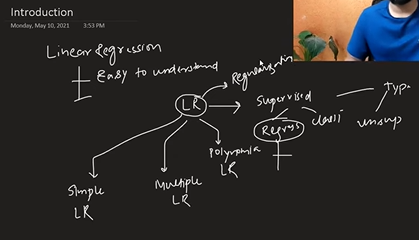

## 2. Types of Linear Regression

### ✅ 1. Simple Linear Regression
- Uses **one input variable**
- Predicts output using a straight line  

**Formula:**  Y = MX + B

Where:
- **M** = slope (coefficient)  
- **B** = y-intercept  
- **X** = input  
- **Y** = predicted output  

**Example:** Predicting placement package based on **CGPA only**.

---

### ✅ 2. Multiple Linear Regression
- Uses **more than one input variable**
- Still predicts a linear output  

**Formula:**  Y = M1X1 + M2X2 + M3*X3 + ... + B


**Example:** Predicting package based on:  
- CGPA  
- Gender  
- 12th marks  
- State  

Each input has its own slope (weight).

---

### ✅ 3. Polynomial Linear Regression
Used when data is **non-linear but follows a curve**.

Instead of: Y = MX + B
We use: Y = M1X + M2X^2 + M3*X^3 + B

It still uses linear regression internally, but with transformed features.

---

## 3. Understanding Real-World Data
- Real-world data is rarely perfectly linear.  
- Reasons: human behavior, market changes, measurement errors, noise, unknown factors.  
- Data looks **"sort of linear"**, not perfect.  

**Terms used:** noise, residuals, real-world factors, toxic errors.

---

## 4. Best Fit Line
- Goal: find a line that **minimizes error** between predicted and actual points.  
- Method: **Least Squares**  
- Minimizes:  Σ(Y_actual - Y_predicted)^2

- Squaring: removes negative values and penalizes larger errors.
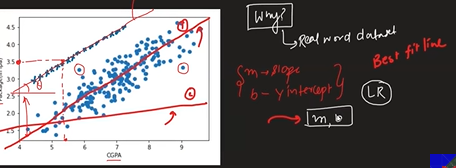

---

## 5. Slope (M) and Intercept (B)

### 🔸 M (Slope)
- Represents **weight/importance** of input.  
- Shows how much output changes when input increases by 1 unit.  

**Example:** M = 2 → Increasing CGPA by 1 increases package by 2 lakh.

### 🔸 B (Y-Intercept)
- Base value of output when input = 0  
- Also called **bias** or **offset**  

**Example:** Minimum package even with 0 CGPA.

---









In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


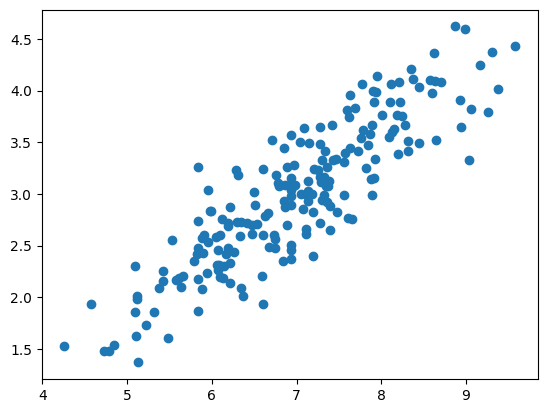

In [4]:
plt.scatter(df['cgpa'],df['package'])

In [6]:
X=df.iloc[:,0:1]
Y=df.iloc[:,-1]

In [7]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [8]:
Y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [13]:
Y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [14]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

c:\Users\archi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

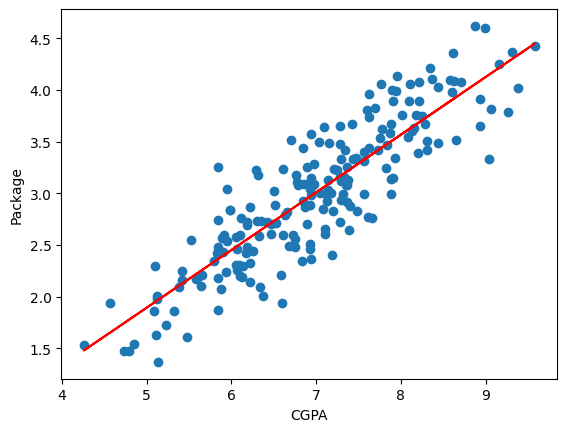

In [15]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.plot(X_train,lr.predict(X_train),color='red')

In [16]:
m=lr.coef_
b=lr.intercept_

In [23]:
# y=mx+b  # y is package and x is cgpa
m*7.82+b # predict the package for a student with 7.5 cgpa

array([3.46707251])

In [24]:
df.loc[df['cgpa']==7.82,'package'].values # to check the actual package for a student with 7.5 cgpa

array([3.25])

In [22]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
